In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os

Summary  of the main parts : 
- Imports
- P0 - Load your data of the tweets.
- P1 - Preprocess df
- P2 - Sentiment analysis of the Tweets of the df
- P3 - Scoring of the users 
- P4 - Creation of Twitter User objects for Descriptive profiling

# - P0 - Load your data of the tweets.


#### Load the dataset of tweets -- PLUG YOUR PATH HERE

In [638]:
path = '/Users/abdeslamguessous/Documents/GitHub/SemesterProject/Extractions_folder/'
df = pd.read_csv( path + 'Run_November_04_40_21Last_DAY_16_.csv')

/Users/abdeslamguessous/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,12,13,14,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [623]:
path = '/Users/abdeslamguessous/Documents/GitHub/SemesterProject/Extractions_folder/'
df = pd.read_csv( path + 'Run_November_00_45_34Last_DAY_2_.csv')


/Users/abdeslamguessous/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (0,1,3,5,6,9,10,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# - P1 - Preprocess df


Filtering out all the useless rows

In [10]:
df = df[ df.author_id.isna() == False]
len(df)

1904240

In [11]:
df['created_at ts'] = pd.to_datetime(df['created_at'], errors = 'coerce')

<ipython-input-11-669a38b235a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at ts'] = pd.to_datetime(df['created_at'], errors = 'coerce')


In [12]:
df = df[df['created_at ts'].isna()== False]

In [13]:
len(df)

1809821

In [14]:
df['day'] = df.apply(lambda x : x['created_at ts'].day , axis=1)

In [15]:
len(df)

1809821

Sanity check of the distribution of the tweets over the days

In [16]:
df.groupby('day').count()

,Unnamed: 0,Unnamed: 0.1,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,...,text,created_at,retweets,replies,likes,quote_count,language,possibly_sensitive,reply_settings,created_at ts
day,,,,,,,,,,,,,,,,,,,,,
1,64959,64959,64959,64959,64959,64959,64959,64959,51839,28623,...,64959,64959,64959,64959,64959,64959,64959,64959,64959,64959
2,69566,69566,69566,69566,69566,69566,69566,69566,55500,30228,...,69566,69566,69566,69566,69566,69566,69566,69566,69566,69566
3,70729,70729,70729,70729,70729,70729,70729,70729,56014,31625,...,70729,70729,70729,70729,70729,70729,70729,70729,70729,70729
4,69888,69888,69888,69888,69888,69888,69888,69888,54162,30539,...,69888,69888,69888,69888,69888,69888,69888,69888,69888,69888
5,74589,74589,74589,74589,74589,74589,74589,74589,56343,31016,...,74589,74589,74589,74589,74589,74589,74589,74589,74589,74589
6,69339,69339,69339,69339,69339,69339,69339,69339,51925,28490,...,69339,69339,69339,69339,69339,69339,69339,69339,69339,69339
7,64668,64668,64668,64668,64668,64668,64668,64668,48631,27273,...,64668,64668,64668,64668,64668,64668,64668,64668,64668,64668
8,87369,87369,87369,87369,87369,87369,87369,87369,67569,38531,...,87369,87369,87369,87369,87369,87369,87369,87369,87369,87369
9,79544,79544,79544,79544,79544,79544,79544,79544,63159,36177,...,79544,79544,79544,79544,79544,79544,79544,79544,79544,79544


In [17]:
print('Il y a ', len(df[df['created_at'].isna()==True]), 'ou la date de création n est pas mentionnée sur ', len(df)) 

Il y a  0 ou la date de création n est pas mentionnée sur  1809821


In [18]:
df['author_id'] = df['author_id'].apply(str) 
df= df[df['username']!='0']

In [19]:
len(df.author_id.unique())-len(df.username.unique())

11241

In [20]:
len(df.author_id.unique())

355726

In [21]:
len(df)-len(df[df['username']!='0'])

0

In [22]:
df = df[df['username']!='0']
len(df)

1809821

In [23]:
## We remove all the tweets with no text as the Tweet related fields are NaN
df = df[df['text'].isna()==False]

In [24]:
len(df)

1809821

In [25]:
df = df[df['created_at']!='everyone']

In [26]:
print( 'Ce df contient des valeurs allant de ', df.sort_values('created_at', ascending=False).created_at.iloc[0],
      'jusqua', df.sort_values('created_at', ascending=True).created_at.iloc[0])

Ce df contient des valeurs allant de  2021-11-29 23:59:58+00:00 jusqua 2021-11-01 00:00:00+00:00


In [27]:
df = df.drop_duplicates(subset=['author_id','text'])
len(df)

1763307

In [29]:
df.groupby('author_id')['author_tweets'].count().sort_values(ascending=False).mean()

4.956924711716321

#### The feature Number of Tweets contains the tweets done by this user during this period

In [30]:
tweets = df.groupby('author_id')['author_tweets'].count()
tweets = pd.DataFrame(tweets)
tweets = tweets.rename(columns={'author_tweets': 'Number Of Tweets'})

In [31]:
tweets.mean()

Number Of Tweets    4.956925
dtype: float64

#### Aggregating Tweets related informations to their user

In [127]:
likes = df.groupby('author_id')['likes'].mean()
likes = pd.DataFrame(likes)
likes = likes.rename(columns={'likes': 'Average of Likes'})
likes.isna().sum()

Average of Likes    0
dtype: int64

In [129]:
retweets = df.groupby('author_id')['retweets'].mean()
retweets = pd.DataFrame(retweets)
retweets = retweets.rename(columns={'retweets': 'Average of retweets'})
retweets.isna().sum()

Average of retweets    0
dtype: int64

In [130]:
replies = df.groupby('author_id')['replies'].mean()
replies = pd.DataFrame(replies)
replies = replies.rename(columns={'replies': 'Average of replies'})
replies.isna().sum()

Average of replies    0
dtype: int64

In [131]:
quote_count = df.groupby('author_id')['quote_count'].mean()
quote_count = pd.DataFrame(quote_count)
quote_count = quote_count.rename(columns={'quote_count': 'Average of quote_count'})
quote_count.isna().sum()

Average of quote_count    0
dtype: int64

In [36]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'created_at ts'],axis=1)

### Exploration 

In [37]:
print('We have ', len(df.username.unique()), 'differents users with', len(df.author_id.unique()),
      'different authors_id.')

We have  344485 differents users with 355726 different authors_id.


In [39]:
df_back_up = df

In [41]:
df

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,...,text,created_at,retweets,replies,likes,quote_count,language,possibly_sensitive,reply_settings,day
0,1456996893586825227,AmfeixE,133,1365.0,89,0,Amfeix still doesnt want to release our BTC. I...,NaN,False,False,...,@amfeix Only 1 question...what are you waiting...,2021-11-15 23:59:57+00:00,14.0,0.0,13.0,0.0,en,False,everyone,15
1,1185049143703724033,hyblockcapital,17726,608.0,181,264,Crypto analytics. Official page of Hyblock Cap...,NaN,False,False,...,We can spot a large bid wall at the bottom of ...,2021-11-15 23:59:56+00:00,0.0,2.0,10.0,0.0,en,False,everyone,15
2,760676340429312000,info32523287,132,134.0,32,0,弱者の戦略/仮想通貨&NFT/ミニマル生活/原始仏教を好み生きる事は苦なのに決して満たされぬ...,NaN,False,False,...,👉I just joined the @metavpad IDO Whitelist \n\...,2021-11-15 23:59:55+00:00,0.0,0.0,0.0,0.0,en,False,everyone,15
3,1356471565110497283,DoggySins,119,5046.0,0,2,do not follow me cause I am just a bot. follow...,Vereinigte Staaten,False,False,...,If you have any suggestion for the next coin t...,2021-11-15 23:59:53+00:00,0.0,0.0,0.0,1.0,en,False,everyone,15
4,1424772962327031810,RahnQard,180,11107.0,2100,12,join Telegram Here: \nhttps://t.co/1CBZ7NT6TM\...,NaN,False,False,...,Bitcoin 1-day AltRank™ is down -4.348% to 88 w...,2021-11-15 23:59:53+00:00,0.0,0.0,0.0,0.0,en,False,everyone,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200277,1413298648939700234,CryptoNerdApp,77.0,3711.0,75.0,3,Crypto Nerd is built to track cryptocurrency p...,NaN,False,False,...,Current Price of Bitcoin:\n$59208 (-1.46%)\n\n...,2021-11-22 00:00:00+00:00,0.0,1.0,0.0,0.0,en,False,everyone,22
2200278,1411427603018362883,SavageDomains,519.0,5333.0,395.0,8,Buying and selling .com domain names. \nhttps:...,NaN,False,False,...,Independent Republic of Making Money\n\nhttps:...,2021-11-22 00:00:00+00:00,0.0,0.0,2.0,0.0,en,False,everyone,22
2200279,968796006576947200,WhaleTrades,188792.0,333075.0,0.0,1554,Keeping you connected to crypto's pulse,NaN,False,False,...,"📈💶$8,829,900 $BTC LONGED @$58866.0 [21/11/21 2...",2021-11-22 00:00:00+00:00,1.0,0.0,8.0,0.0,en,False,everyone,22
2200280,51904755,TopCryptoHound,1048.0,50029.0,2996.0,13,#Web3 #GameFi #Crypto #Bitcoin #ETH #Developer,Singapore,False,False,...,Top 10 #Cryptocurrency Live Prices: \n(07:00 P...,2021-11-22 00:00:00+00:00,1.0,0.0,1.0,0.0,en,False,everyone,22


In [18]:
df = pd.read_csv(PE_path +'Pycharm_files_V3/' + 'Tweets_filtered_V3.csv')

In [107]:
df[df['username']=='shu_crypto'].text

16    @crypt_guko @DEG_2020 BTC, ETH, SOL, 🐕
Name: text, dtype: object

# - P2 - Sentiment analysis of the Tweets of the df


#### NLP Libraries

In [110]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline  

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

#The data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
nlp = spacy.load('en_core_web_sm')

# - P2 - Sentiment analysis of the Tweets of the df


In [180]:
example = 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.'


In [195]:
example = 'Fuck All of you, I love her'

In [196]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(example)

In [197]:
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

Fuck All of you, I love her 

Negative sentiment: 0.276
Neutral sentiment: 0.394
Positive sentiment: 0.331
Compound sentiment: 0.1779


In [199]:
df_sample = df.sample(10000)

In [201]:
df_sample.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_following', 'author_listed', 'author_description',
       'author_location', 'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'text', 'created_at', 'retweets', 'replies',
       'likes', 'quote_count', 'language', 'possibly_sensitive',
       'reply_settings', 'day'],
      dtype='object')

In [208]:
df['Tweet_Sentiment']= df.apply(lambda x : analyzer.polarity_scores(x['text'])['compound'], axis=1 )


In [213]:
df

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,...,created_at,retweets,replies,likes,quote_count,language,possibly_sensitive,reply_settings,day,Tweet_Sentiment
0,1456996893586825227,AmfeixE,133,1365.0,89,0,Amfeix still doesnt want to release our BTC. I...,NaN,False,False,...,2021-11-15 23:59:57+00:00,14.0,0.0,13.0,0.0,en,False,everyone,15,-0.4871
1,1185049143703724033,hyblockcapital,17726,608.0,181,264,Crypto analytics. Official page of Hyblock Cap...,NaN,False,False,...,2021-11-15 23:59:56+00:00,0.0,2.0,10.0,0.0,en,False,everyone,15,0.0772
2,760676340429312000,info32523287,132,134.0,32,0,弱者の戦略/仮想通貨&NFT/ミニマル生活/原始仏教を好み生きる事は苦なのに決して満たされぬ...,NaN,False,False,...,2021-11-15 23:59:55+00:00,0.0,0.0,0.0,0.0,en,False,everyone,15,0.4003
3,1356471565110497283,DoggySins,119,5046.0,0,2,do not follow me cause I am just a bot. follow...,Vereinigte Staaten,False,False,...,2021-11-15 23:59:53+00:00,0.0,0.0,0.0,1.0,en,False,everyone,15,0.3182
4,1424772962327031810,RahnQard,180,11107.0,2100,12,join Telegram Here: \nhttps://t.co/1CBZ7NT6TM\...,NaN,False,False,...,2021-11-15 23:59:53+00:00,0.0,0.0,0.0,0.0,en,False,everyone,15,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200277,1413298648939700234,CryptoNerdApp,77.0,3711.0,75.0,3,Crypto Nerd is built to track cryptocurrency p...,NaN,False,False,...,2021-11-22 00:00:00+00:00,0.0,1.0,0.0,0.0,en,False,everyone,22,0.0000
2200278,1411427603018362883,SavageDomains,519.0,5333.0,395.0,8,Buying and selling .com domain names. \nhttps:...,NaN,False,False,...,2021-11-22 00:00:00+00:00,0.0,0.0,2.0,0.0,en,False,everyone,22,0.0000
2200279,968796006576947200,WhaleTrades,188792.0,333075.0,0.0,1554,Keeping you connected to crypto's pulse,NaN,False,False,...,2021-11-22 00:00:00+00:00,1.0,0.0,8.0,0.0,en,False,everyone,22,0.0000
2200280,51904755,TopCryptoHound,1048.0,50029.0,2996.0,13,#Web3 #GameFi #Crypto #Bitcoin #ETH #Developer,Singapore,False,False,...,2021-11-22 00:00:00+00:00,1.0,0.0,1.0,0.0,en,False,everyone,22,0.5562


#### --->  Mark here the users you want to keep, if any filter needed :


In [1]:
active_users = []

In [244]:
df_sentiment = df[df['author_id'].isin(active_users)]
df_sentiment

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,...,created_at,retweets,replies,likes,quote_count,language,possibly_sensitive,reply_settings,day,Tweet_Sentiment
0,1456996893586825227,AmfeixE,133,1365.0,89,0,Amfeix still doesnt want to release our BTC. I...,NaN,False,False,...,2021-11-15 23:59:57+00:00,14.0,0.0,13.0,0.0,en,False,everyone,15,-0.4871
4,1424772962327031810,RahnQard,180,11107.0,2100,12,join Telegram Here: \nhttps://t.co/1CBZ7NT6TM\...,NaN,False,False,...,2021-11-15 23:59:53+00:00,0.0,0.0,0.0,0.0,en,False,everyone,15,0.0000
5,1292457447945170945,xannyfeelings,171,1046.0,202,3,"“Not for you, for me” To make me feel better? ...",NaN,False,False,...,2021-11-15 23:59:52+00:00,1.0,0.0,16.0,0.0,en,False,everyone,15,-0.8519
6,1263857631069786114,frickavelli,293,5395.0,925,12,half on a trip,Oregon (kombucha),False,False,...,2021-11-15 23:59:51+00:00,0.0,0.0,0.0,0.0,en,False,everyone,15,0.0000
7,1428059670552334342,coinrbicom,1662,223919.0,4814,28,Free Realtime whale Transactions (Volume)\nche...,SEOUL,False,False,...,2021-11-15 23:59:49+00:00,0.0,0.0,0.0,0.0,en,False,everyone,15,0.6670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200277,1413298648939700234,CryptoNerdApp,77.0,3711.0,75.0,3,Crypto Nerd is built to track cryptocurrency p...,NaN,False,False,...,2021-11-22 00:00:00+00:00,0.0,1.0,0.0,0.0,en,False,everyone,22,0.0000
2200278,1411427603018362883,SavageDomains,519.0,5333.0,395.0,8,Buying and selling .com domain names. \nhttps:...,NaN,False,False,...,2021-11-22 00:00:00+00:00,0.0,0.0,2.0,0.0,en,False,everyone,22,0.0000
2200279,968796006576947200,WhaleTrades,188792.0,333075.0,0.0,1554,Keeping you connected to crypto's pulse,NaN,False,False,...,2021-11-22 00:00:00+00:00,1.0,0.0,8.0,0.0,en,False,everyone,22,0.0000
2200280,51904755,TopCryptoHound,1048.0,50029.0,2996.0,13,#Web3 #GameFi #Crypto #Bitcoin #ETH #Developer,Singapore,False,False,...,2021-11-22 00:00:00+00:00,1.0,0.0,1.0,0.0,en,False,everyone,22,0.5562


In [295]:
df_sentiment = df_sentiment.sort_values(by='day')

In [296]:
df_sentiment = df_sentiment.reset_index().drop('index',axis=1)

In [273]:
df_sentiment.head(10000)

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,...,created_at,retweets,replies,likes,quote_count,language,possibly_sensitive,reply_settings,day,Tweet_Sentiment
0,965548724247191552,coinmonks,5010.0,17548.0,2407.0,147,A Crypto Educational Publication ( ❤️ by 2M re...,Earth,False,False,...,2021-11-01 06:05:57+00:00,0.0,0.0,0.0,0.0,en,False,everyone,1,0.0000
1,1319997007310639104,kusum_nishant,64.0,1387.0,1221.0,4,#BlueMove and #MOVErs in Twitter bio,"Sambalpur, India",False,False,...,2021-11-01 08:48:45+00:00,0.0,1.0,0.0,0.0,en,False,everyone,1,0.6705
2,1386794807075409925,Daan87111898,15.0,3850.0,163.0,5,NaN,"Amsterdam, Niederlande",False,False,...,2021-11-01 08:48:41+00:00,0.0,0.0,0.0,0.0,en,False,everyone,1,0.9165
3,1451981372697030665,kefelioglu_emir,24.0,187.0,18.0,0,NaN,NaN,False,False,...,2021-11-01 08:48:40+00:00,0.0,4.0,9.0,0.0,en,False,everyone,1,0.2023
4,1345705370489028609,Abhinav18755615,2907.0,52523.0,4997.0,25,Love all ! Forgive & Move on What is planned f...,Cardiff,False,False,...,2021-11-01 08:48:36+00:00,7.0,8.0,31.0,0.0,en,True,everyone,1,0.0772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1374776463166148609,WatchingBitcoin,192.0,14018.0,0.0,1,#bitcoin,NaN,False,False,...,2021-11-01 02:03:49+00:00,0.0,0.0,0.0,0.0,en,False,everyone,1,0.0000
9996,2281314234,bitcoinagile,66268.0,1336240.0,14034.0,6731,"Bitcoin, Blockchain & Beyond. #bitcoin #blockc...",Matter Doesn't Matter,False,False,...,2021-11-01 02:04:36+00:00,0.0,0.0,1.0,0.0,en,False,everyone,1,0.0000
9997,1402726833490214918,Alebrahimi_H,2333.0,20946.0,6.0,3,Forex trading analyst/ collaborator. Tweets ar...,German,False,False,...,2021-11-01 02:04:36+00:00,0.0,0.0,0.0,0.0,en,True,everyone,1,-0.5994
9998,1341253120693825536,Pasteli87031131,2.0,439.0,96.0,1,NaN,NaN,False,False,...,2021-11-01 02:05:00+00:00,0.0,0.0,0.0,0.0,en,False,everyone,1,0.2023


In [277]:
df_sentiment.iloc[1000].day

1

df_back_safe = df_sentiment

In [342]:
df_sentiment = df_back_safe

In [343]:
len(df_sentiment)

1053230

In [310]:
#df_sentiment = df_sentiment.sample(50000)

In [358]:
df_sentiment.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 28, 29])

# - P3 - Scoring of the users 


In [371]:
from statistics import mean
from statistics import variance


start_day = 2
end_day = 29
## Range de 3 jours
lst_indices = []
tmp_value = 0
dict_val = {}

for iterator in range(start_day, end_day):
    print('DAY', iterator, tmp_value)
    interval = (iterator -1, iterator + 1)
    list_interval = []
    tmp_dict = {}
    #print('New Range', interval)
  #  for idx in range(tmp_value, len(df_sentiment)):
    for idx in range(0, len(df_sentiment)):
        if df_sentiment['day'].iloc[idx] in interval:
            #if len(list_interval) == 0
            list_interval.append(df_sentiment['Tweet_Sentiment'].iloc[idx])
            #print('Yes', interval, idx, df_sentiment['day'].iloc[idx])
           # continue
        #else :
        #    tmp_value = idx
           # print('idx' , tmp_value , 'iterator', iterator )
        #    break
    print('Len of this', len(list_interval))
    if len(list_interval)> 1 : 
        tmp_dict['mean'] = mean(list_interval)
        tmp_dict['var'] = variance(list_interval)
        dict_val[iterator] = tmp_dict
    

DAY 2 0
Len of this 78534
DAY 3 0
Len of this 85508
DAY 4 0
Len of this 86665
DAY 5 0
Len of this 83852
DAY 6 0
Len of this 84362
DAY 7 0
Len of this 83589
DAY 8 0
Len of this 84982
DAY 9 0
Len of this 87667
DAY 10 0
Len of this 92171
DAY 11 0
Len of this 94712
DAY 12 0
Len of this 46393
DAY 13 0
Len of this 49823
DAY 14 0
Len of this 50759
DAY 15 0
Len of this 55709
DAY 16 0
Len of this 104434
DAY 17 0
Len of this 107493
DAY 18 0
Len of this 96321
DAY 19 0
Len of this 91473
DAY 20 0
Len of this 83068
DAY 21 0
Len of this 83545
DAY 22 0
Len of this 83981
DAY 23 0
Len of this 85687
DAY 24 0
Len of this 43559
DAY 25 0
Len of this 41831
DAY 26 0
Len of this 0
DAY 27 0
Len of this 33659
DAY 28 0
Len of this 36765


In [372]:
dict_val

{2: {'mean': 0.23761896630758653, 'var': 0.1506211793325059},
 3: {'mean': 0.2278117450998737, 'var': 0.15973890119983622},
 4: {'mean': 0.26600315467605146, 'var': 0.15675784480681149},
 5: {'mean': 0.27313122883175117, 'var': 0.1558064136991113},
 6: {'mean': 0.28890732083165405, 'var': 0.1506715809267156},
 7: {'mean': 0.28567940398856306, 'var': 0.14738113809233272},
 8: {'mean': 0.28548241039278904, 'var': 0.1486318125711283},
 9: {'mean': 0.2785019482815655, 'var': 0.15785637488772425},
 10: {'mean': 0.27032499267665533, 'var': 0.16648530850110524},
 11: {'mean': 0.2722597178815778, 'var': 0.17080919125947},
 12: {'mean': 0.25814058370874915, 'var': 0.17603244705572066},
 13: {'mean': 0.2665199285470566, 'var': 0.17000798900531786},
 14: {'mean': 0.27675148840599695, 'var': 0.160532407767151},
 15: {'mean': 0.2434170546949326, 'var': 0.15521309717682083},
 16: {'mean': 0.2724809870348737, 'var': 0.15853504028121243},
 17: {'mean': 0.24017335733489623, 'var': 0.1584478373012696},


In [313]:
len(list_interval)

33659

In [314]:
df_sentiment.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_following', 'author_listed', 'author_description',
       'author_location', 'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'text', 'created_at', 'retweets', 'replies',
       'likes', 'quote_count', 'language', 'possibly_sensitive',
       'reply_settings', 'day', 'Tweet_Sentiment'],
      dtype='object')

In [327]:
df_test_sentiment = df_sentiment.sample(10000)

In [364]:
len(df_sentiment)

1053230

In [373]:
df_test_sentiment = df_sentiment

In [2]:
#df_test_sentiment[df_test_sentiment['crowd_scoring_standardized']>0].count()

In [378]:
dict_val

{2: {'mean': 0.23761896630758653, 'var': 0.1506211793325059},
 3: {'mean': 0.2278117450998737, 'var': 0.15973890119983622},
 4: {'mean': 0.26600315467605146, 'var': 0.15675784480681149},
 5: {'mean': 0.27313122883175117, 'var': 0.1558064136991113},
 6: {'mean': 0.28890732083165405, 'var': 0.1506715809267156},
 7: {'mean': 0.28567940398856306, 'var': 0.14738113809233272},
 8: {'mean': 0.28548241039278904, 'var': 0.1486318125711283},
 9: {'mean': 0.2785019482815655, 'var': 0.15785637488772425},
 10: {'mean': 0.27032499267665533, 'var': 0.16648530850110524},
 11: {'mean': 0.2722597178815778, 'var': 0.17080919125947},
 12: {'mean': 0.25814058370874915, 'var': 0.17603244705572066},
 13: {'mean': 0.2665199285470566, 'var': 0.17000798900531786},
 14: {'mean': 0.27675148840599695, 'var': 0.160532407767151},
 15: {'mean': 0.2434170546949326, 'var': 0.15521309717682083},
 16: {'mean': 0.2724809870348737, 'var': 0.15853504028121243},
 17: {'mean': 0.24017335733489623, 'var': 0.1584478373012696},


In [379]:
# uses dict_val
# Start : 16h55
df_test_sentiment['crowd_scoring_standardized']=''
df_test_sentiment['crowd_scoring_not_std']=''
crowd_scoring = []
for idx in range(len(df_test_sentiment)): 
    if idx % 50000==0:
        print(idx)
    day = df_test_sentiment['day'].iloc[idx]
    if day == 1:
        day = 2
    if day == 29:
        day = 27
 #   print(day)
    day_vibes = dict_val[day]
  #  print(day, day_vibes)
    
    df_test_sentiment['crowd_scoring_standardized'].iloc[idx] = abs( df_test_sentiment['Tweet_Sentiment'].iloc[idx] - day_vibes['mean']) / day_vibes['var']  

    

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000


In [380]:
df_test_sentiment.to_csv(extractions + 'Scoring_FULL.csv')

#### Analysis of the scoring

In [4]:
df_sentiment = pd.read_csv(extractions + 'Scoring_FULL.csv')

In [6]:
df_test_sentiment=df_sentiment

In [27]:
df_test_sentiment

,Unnamed: 0,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,...,retweets,replies,likes,quote_count,language,possibly_sensitive,reply_settings,day,Tweet_Sentiment,crowd_scoring_standardized
0,0,9.655487e+17,coinmonks,5010.0,17548.0,2407.0,147,A Crypto Educational Publication ( ❤️ by 2M re...,Earth,False,...,0.0,0.0,0.0,0.0,en,False,everyone,1,0.0000,1.577593
1,1,1.319997e+18,kusum_nishant,64.0,1387.0,1221.0,4,#BlueMove and #MOVErs in Twitter bio,"Sambalpur, India",False,...,0.0,1.0,0.0,0.0,en,False,everyone,1,0.6705,2.873972
2,2,1.386795e+18,Daan87111898,15.0,3850.0,163.0,5,NaN,"Amsterdam, Niederlande",False,...,0.0,0.0,0.0,0.0,en,False,everyone,1,0.9165,4.507208
3,3,1.451981e+18,kefelioglu_emir,24.0,187.0,18.0,0,NaN,NaN,False,...,0.0,4.0,9.0,0.0,en,False,everyone,1,0.2023,0.234489
4,4,1.345705e+18,Abhinav18755615,2907.0,52523.0,4997.0,25,Love all ! Forgive & Move on What is planned f...,Cardiff,False,...,7.0,8.0,31.0,0.0,en,True,everyone,1,0.0772,1.065049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053225,1053225,1.414042e+18,LRhanyeri,101.0,19254.0,130.0,9,"Profissional Day Trader Bolsa de Valores, \nAn...",NaN,False,...,0.0,0.0,0.0,0.0,en,False,everyone,29,0.7170,3.177090
1053226,1053226,7.637035e+08,FoulAdnan,373.0,3054.0,1137.0,7,#Crypto #BSC #MATIC,"Rajbari,Dhaka,Bangladesh",False,...,0.0,0.0,0.0,0.0,en,True,everyone,29,-0.2481,2.850944
1053227,1053227,1.388246e+18,ZrGaming19,2485.0,1955.0,4219.0,1,Crypto Enthusiast || Gem Holder|| Crypto Gem F...,NaN,False,...,0.0,0.0,0.0,0.0,en,False,everyone,29,0.0000,1.301306
1053228,1053228,1.393282e+18,755Anaconda,5171.0,48573.0,5419.0,23,@solonlabs Boule 🦉 | VeeFriends | DapperDinos ...,NaN,False,...,0.0,0.0,1.0,0.0,en,False,everyone,29,0.8074,3.741731


In [23]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'author_id', 'username',
       'author_followers', 'author_tweets', 'author_following',
       'author_listed', 'author_description', 'author_location',
       'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'text', 'created_at', 'retweets', 'replies',
       'likes', 'quote_count', 'language', 'possibly_sensitive',
       'reply_settings'],
      dtype='object')

### Let's put all together

In [7]:
df_test_sentiment.drop('crowd_scoring_not_std',axis=1,inplace=True)

In [8]:
df_test_sentiment

,Unnamed: 0,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,...,retweets,replies,likes,quote_count,language,possibly_sensitive,reply_settings,day,Tweet_Sentiment,crowd_scoring_standardized
0,0,9.655487e+17,coinmonks,5010.0,17548.0,2407.0,147,A Crypto Educational Publication ( ❤️ by 2M re...,Earth,False,...,0.0,0.0,0.0,0.0,en,False,everyone,1,0.0000,1.577593
1,1,1.319997e+18,kusum_nishant,64.0,1387.0,1221.0,4,#BlueMove and #MOVErs in Twitter bio,"Sambalpur, India",False,...,0.0,1.0,0.0,0.0,en,False,everyone,1,0.6705,2.873972
2,2,1.386795e+18,Daan87111898,15.0,3850.0,163.0,5,NaN,"Amsterdam, Niederlande",False,...,0.0,0.0,0.0,0.0,en,False,everyone,1,0.9165,4.507208
3,3,1.451981e+18,kefelioglu_emir,24.0,187.0,18.0,0,NaN,NaN,False,...,0.0,4.0,9.0,0.0,en,False,everyone,1,0.2023,0.234489
4,4,1.345705e+18,Abhinav18755615,2907.0,52523.0,4997.0,25,Love all ! Forgive & Move on What is planned f...,Cardiff,False,...,7.0,8.0,31.0,0.0,en,True,everyone,1,0.0772,1.065049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053225,1053225,1.414042e+18,LRhanyeri,101.0,19254.0,130.0,9,"Profissional Day Trader Bolsa de Valores, \nAn...",NaN,False,...,0.0,0.0,0.0,0.0,en,False,everyone,29,0.7170,3.177090
1053226,1053226,7.637035e+08,FoulAdnan,373.0,3054.0,1137.0,7,#Crypto #BSC #MATIC,"Rajbari,Dhaka,Bangladesh",False,...,0.0,0.0,0.0,0.0,en,True,everyone,29,-0.2481,2.850944
1053227,1053227,1.388246e+18,ZrGaming19,2485.0,1955.0,4219.0,1,Crypto Enthusiast || Gem Holder|| Crypto Gem F...,NaN,False,...,0.0,0.0,0.0,0.0,en,False,everyone,29,0.0000,1.301306
1053228,1053228,1.393282e+18,755Anaconda,5171.0,48573.0,5419.0,23,@solonlabs Boule 🦉 | VeeFriends | DapperDinos ...,NaN,False,...,0.0,0.0,1.0,0.0,en,False,everyone,29,0.8074,3.741731


In [9]:
score = df_test_sentiment.groupby('author_id')['crowd_scoring_standardized'].mean()
score = pd.DataFrame(score)
score = score.rename(columns={'crowd_scoring_standardized': 'Score Average'})

In [16]:
score = score.sort_values(by='Score Average',ascending=False)

In [17]:
#score.to_csv(extractions + '/Authors_score_crowd2.csv')

In [28]:
score

,Score Average
author_id,
9.482807e+17,8.277383
1.648070e+08,8.222213
1.437481e+18,8.030464
2.970023e+09,7.963163
1.391368e+18,7.905810
...,...
8.365002e+17,0.070763
1.375363e+18,0.062101
1.392842e+18,0.056280


In [394]:
from sklearn.cluster import KMeans
import pandas as pd

# Assume that you have a dataframe with a column called "X"
X = score[["Score Average"]]

# The number of clusters you want to create is specified by the "n_clusters" parameter
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# The model will learn the cluster centers and assign each data point to a cluster
# You can predict the cluster labels for new data using the predict method
predictions = kmeans.predict(X)

# The cluster labels are stored in the "labels_" attribute
cluster_labels = kmeans.labels_

In [397]:
X['Label']=cluster_labels

In [405]:
X[X['Label']==1]['Score Average'].count()

7576

In [406]:
X[X['Label']==0]['Score Average'].count()

6834

In [407]:
X[X['Label']==2]['Score Average'].count()

3188

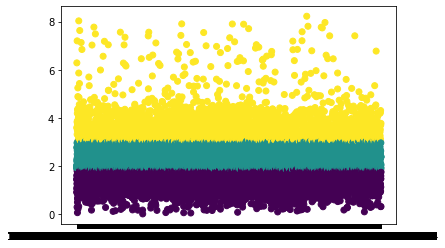

In [404]:
plt.scatter(score.index, score['Score Average'],  c=cluster_labels, cmap="viridis")


In [207]:
#df_sample.to_csv(extractions + 'Sentiment_analysis.csv')

# - P4 - Creation of Twitter User objects for Descriptive profiling

In [132]:
dfa = df 

In [133]:
len(dfa.author_id.unique())

355726

In [135]:
user_fields = ['author_id','username','author_followers','author_tweets', 'author_following', 
               'author_listed', 'author_description','author_location','author_private',
               'author_verified','author_url', 'author_account_creation']


df_users = dfa[user_fields]


In [136]:
print('Le df initialement contient' , len(df_users), ' lignes et si on drop les duplicats (complets) on se retrouve avec ',
     len(df_users.drop_duplicates()), '  lignes')

Le df initialement contient 1763307  lignes et si on drop les duplicats (complets) on se retrouve avec  534443   lignes


In [137]:
len(df_users.author_id.unique())

355726

In [138]:
df_users_dup = df_users.drop_duplicates(subset=['author_id', 'username'], keep = 'last' )
df_users_dup
## 167K

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation
2,760676340429312000,info32523287,132,134.0,32,0,弱者の戦略/仮想通貨&NFT/ミニマル生活/原始仏教を好み生きる事は苦なのに決して満たされぬ...,NaN,False,False,NaN,2016-08-03 03:19:07+00:00
10,4441633397,H7Banksss,9,108.0,216,1,@weaboveofficial,"Paris, France",False,False,NaN,2015-12-10 21:42:43+00:00
16,902534018867933185,shu_crypto,206,7189.0,66,1,仮想通貨投資やってます。botも少し齧ってます。億稼いで正社員やめてフリーターになりたい。,日本 東京,False,False,NaN,2017-08-29 14:10:53+00:00
19,1176487215721013248,iso_kay2,103,679.0,174,0,money mafia 🦅💵 LLKD21 🕊 #FREESTEPOKDENN🤝 #dell...,NaN,False,False,NaN,2019-09-24 13:23:37+00:00
20,37078673,nacho__pepe,50,678.0,990,0,Software engineer. Bostero y Madridista. Anti ...,"London, England",False,False,NaN,2009-05-01 23:44:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2200277,1413298648939700234,CryptoNerdApp,77.0,3711.0,75.0,3,Crypto Nerd is built to track cryptocurrency p...,NaN,False,False,NaN,2021-07-09 00:47:18+00:00
2200278,1411427603018362883,SavageDomains,519.0,5333.0,395.0,8,Buying and selling .com domain names. \nhttps:...,NaN,False,False,NaN,2021-07-03 20:52:34+00:00
2200279,968796006576947200,WhaleTrades,188792.0,333075.0,0.0,1554,Keeping you connected to crypto's pulse,NaN,False,False,NaN,2018-02-28 10:32:22+00:00
2200280,51904755,TopCryptoHound,1048.0,50029.0,2996.0,13,#Web3 #GameFi #Crypto #Bitcoin #ETH #Developer,Singapore,False,False,NaN,2009-06-29 01:07:03+00:00


### 2 (a) Preprocessing

In [140]:
df_users_dup['author followers int']=''
for idx in range(len(df_users_dup)):
    if idx %10000 == 0:
        print(idx)
    try :
        df_users_dup['author followers int'].iloc[idx]= int(df_users_dup['author_followers'].iloc[idx])
    except:
        df_users_dup['author followers int'].iloc[idx] = 'Not working'

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000


In [144]:
df_users_dup = df_users_dup[df_users_dup['author followers int']!='Not working']
len(df_users_dup)

337049

In [145]:
df_users_dup.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_following', 'author_listed', 'author_description',
       'author_location', 'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'author followers int'],
      dtype='object')

In [148]:
df_users_dup['author_followers']= df_users_dup['author followers int']

In [149]:
df_users_dup = df_users_dup.drop(['author followers int'],axis=1)

In [150]:
df_users_dup['author_followers'] = df_users_dup['author_followers'].apply(int) 
df_users_dup['author_following'] = df_users_dup['author_following'].apply(int) 
df_users_dup['author_listed'] = df_users_dup['author_listed'].apply(int) 

In [151]:
df_users_dup.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_following', 'author_listed', 'author_description',
       'author_location', 'author_private', 'author_verified', 'author_url',
       'author_account_creation'],
      dtype='object')

In [152]:
df_users_dup = df_users_dup[df_users_dup['username']!='1']
df_users_dup = df_users_dup[df_users_dup['author_verified'].isna()==False]

In [153]:
len(df_users_dup)

337049

In [164]:
df_users_dup['author_account_creation'] = pd.to_datetime(df_users_dup['author_account_creation'], errors = 'coerce')

In [165]:
type(df_users_dup.author_account_creation.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [166]:
df_users_dup['Year Creation']= df.apply(lambda x :  x['author_account_creation'].year if isinstance(x['author_account_creation'], pd.Timestamp) else 'not working', axis=1)




In [167]:
df_users_dup['Year Creation'].unique()

array(['not working'], dtype=object)

In [77]:
df_users_dup['Year Creation']=''
for idx in range(len(df_users_dup)):
    try :
        df_users_dup['Year Creation'].iloc[idx]= str(df_users_dup['author_account_creation'].iloc[idx]).split('-')[0]
    except:
        df_users_dup['Year Creation'].iloc[idx] = 'Not working'

/Users/abdeslamguessous/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [159]:
df_users_dup['Year Creation'] = df_users_dup['Year Creation'].apply(int)

ValueError: invalid literal for int() with base 10: 'not working'

In [ ]:
## Elimine toutes les dates de création de compte absurdes
twitter_date_creation = 2006
df_users_dup = df_users_dup[df_users_dup['Year Creation']>= twitter_date_creation]

In [ ]:
len(df_users_dup)

In [84]:
len(df_users_dup[df_users_dup['author_following']==0])

4492

In [563]:
#FF_ratio2 = author_follower_count / (author_follower_count + author_following_count)

In [78]:
df_users_dup.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_following', 'author_listed', 'author_description',
       'author_location', 'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'Year Creation'],
      dtype='object')

In [168]:
df_users_dup['FF_ratio2'] = df_users_dup.apply(lambda x : int(x.author_followers) / (int(x.author_followers) + int(x['author_following']))  if (int(x.author_followers) + int(x['author_following'])) != 0 else -1, axis=1)


In [169]:
df_users_dup['FF_Ratio'] = df_users_dup.apply(lambda x : int(x.author_followers)/int(x['author_following']) if 
                                        int(x['author_following']) != 0
                                              else -1
                                              , axis = 1)



In [170]:
df_users_dup

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_ratio2,FF_Ratio
2,760676340429312000,info32523287,132,134.0,32,0,弱者の戦略/仮想通貨&NFT/ミニマル生活/原始仏教を好み生きる事は苦なのに決して満たされぬ...,NaN,False,False,NaN,2016-08-03 03:19:07+00:00,not working,0.804878,4.125000
10,4441633397,H7Banksss,9,108.0,216,1,@weaboveofficial,"Paris, France",False,False,NaN,2015-12-10 21:42:43+00:00,not working,0.040000,0.041667
16,902534018867933185,shu_crypto,206,7189.0,66,1,仮想通貨投資やってます。botも少し齧ってます。億稼いで正社員やめてフリーターになりたい。,日本 東京,False,False,NaN,2017-08-29 14:10:53+00:00,not working,0.757353,3.121212
19,1176487215721013248,iso_kay2,103,679.0,174,0,money mafia 🦅💵 LLKD21 🕊 #FREESTEPOKDENN🤝 #dell...,NaN,False,False,NaN,2019-09-24 13:23:37+00:00,not working,0.371841,0.591954
20,37078673,nacho__pepe,50,678.0,990,0,Software engineer. Bostero y Madridista. Anti ...,"London, England",False,False,NaN,2009-05-01 23:44:00+00:00,not working,0.048077,0.050505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200277,1413298648939700234,CryptoNerdApp,77,3711.0,75,3,Crypto Nerd is built to track cryptocurrency p...,NaN,False,False,NaN,2021-07-09 00:47:18+00:00,not working,0.506579,1.026667
2200278,1411427603018362883,SavageDomains,519,5333.0,395,8,Buying and selling .com domain names. \nhttps:...,NaN,False,False,NaN,2021-07-03 20:52:34+00:00,not working,0.567834,1.313924
2200279,968796006576947200,WhaleTrades,188792,333075.0,0,1554,Keeping you connected to crypto's pulse,NaN,False,False,NaN,2018-02-28 10:32:22+00:00,not working,1.000000,-1.000000
2200280,51904755,TopCryptoHound,1048,50029.0,2996,13,#Web3 #GameFi #Crypto #Bitcoin #ETH #Developer,Singapore,False,False,NaN,2009-06-29 01:07:03+00:00,not working,0.259149,0.349800


In [176]:
df_joined = df_users_dup.set_index('author_id').join(tweets).join(likes).join(retweets).join(replies).join(quote_count)

In [178]:
#df_joined.to_csv(extractions + 'November_full_V3.csv')

In [223]:
df_joined['Number Of Tweets'].quantile(0.95)

13.0

In [237]:
df_joined

,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_ratio2,FF_Ratio,Number Of Tweets,Average of Likes,Average of retweets,Average of replies,Average of quote_count
author_id,,,,,,,,,,,,,,,,,,,
1.0000270311266345e+18,kev1188,355,17456.0,275,2,#xvg 1$ 🥳 #crypto #btc,"Hessen, Deutschland",False,False,NaN,2018-05-25 14:53:18+00:00,not working,0.563492,1.290909,1,1.0,0.0,0.0,0.0
1.0000735939114312e+18,cryptooster,384,6986.0,1414,15,I don't make any money in crypto. most of my t...,CT World,False,False,NaN,2018-05-25 17:58:20+00:00,not working,0.213571,0.271570,3,1.0,0.0,0.0,0.0
1.0000774032454369e+18,SamuTAAAL,1503,18703.0,1309,7,Scalper · Swing trader 🧢 Full time trader. I u...,charts,False,False,NaN,2018-05-25 18:13:28+00:00,not working,0.534495,1.148205,2,0.0,0.0,0.0,0.0
1.0000774835746898e+18,frknkrkya1,51,1378.0,1373,8,#SuiGlobalRider,NaN,False,False,NaN,2018-05-25 18:13:47+00:00,not working,0.035815,0.037145,1,0.0,0.0,0.0,0.0
1.0002565041869824e+18,CryptoCarmack,222,1671.0,242,2,"just chillin, thinkin out loud | $ETH me 🌙","Dallas, TX",False,False,NaN,2018-05-26 06:05:09+00:00,not working,0.478448,0.917355,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999972265818296320,_CryptoAnarchy,1136,2576.0,73,37,"Encryption, digital money, anonymous networks,...",- Timothy C. May,False,False,NaN,2018-05-25 11:15:41+00:00,not working,0.939620,15.561644,1,0.0,0.0,1.0,0.0
999983201627066368,PDB3331,580,6129.0,1435,9,#Bitcoin + $more (incl. ishealthy.eth | isenou...,Here,False,False,NaN,2018-05-25 11:59:08+00:00,not working,0.287841,0.404181,1,0.0,0.0,0.0,0.0
999986959677362177,_7R01,187,4182.0,525,0,-... ..- -.-- / -... .. - -.-. --- .. -.,"Moon, PA",False,False,NaN,2018-05-25 12:14:04+00:00,not working,0.262640,0.356190,1,0.0,0.0,0.0,0.0


In [239]:
active_users = df_joined[df_joined['Number Of Tweets']>=13].index

In [240]:
len(active_users)

17601

#### Resultat du preprocessing

In [96]:
df_users_dup

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_ratio2,FF_Ratio,Number Of Tweets,Average of Likes,Average of retweets,Average of replies,Average of quote_count
2,760676340429312000,info32523287,132,134.0,32,0,弱者の戦略/仮想通貨&NFT/ミニマル生活/原始仏教を好み生きる事は苦なのに決して満たされぬ...,NaN,False,False,NaN,2016-08-03 03:19:07+00:00,2016,0.804878,4.125000,NaN,NaN,NaN,NaN,NaN
10,4441633397,H7Banksss,9,108.0,216,1,@weaboveofficial,"Paris, France",False,False,NaN,2015-12-10 21:42:43+00:00,2015,0.040000,0.041667,NaN,NaN,NaN,NaN,NaN
16,902534018867933185,shu_crypto,206,7189.0,66,1,仮想通貨投資やってます。botも少し齧ってます。億稼いで正社員やめてフリーターになりたい。,日本 東京,False,False,NaN,2017-08-29 14:10:53+00:00,2017,0.757353,3.121212,NaN,NaN,NaN,NaN,NaN
19,1176487215721013248,iso_kay2,103,679.0,174,0,money mafia 🦅💵 LLKD21 🕊 #FREESTEPOKDENN🤝 #dell...,NaN,False,False,NaN,2019-09-24 13:23:37+00:00,2019,0.371841,0.591954,NaN,NaN,NaN,NaN,NaN
20,37078673,nacho__pepe,50,678.0,990,0,Software engineer. Bostero y Madridista. Anti ...,"London, England",False,False,NaN,2009-05-01 23:44:00+00:00,2009,0.048077,0.050505,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200277,1413298648939700234,CryptoNerdApp,77,3711.0,75,3,Crypto Nerd is built to track cryptocurrency p...,NaN,False,False,NaN,2021-07-09 00:47:18+00:00,2021,0.506579,1.026667,NaN,NaN,NaN,NaN,NaN
2200278,1411427603018362883,SavageDomains,519,5333.0,395,8,Buying and selling .com domain names. \nhttps:...,NaN,False,False,NaN,2021-07-03 20:52:34+00:00,2021,0.567834,1.313924,NaN,NaN,NaN,NaN,NaN
2200279,968796006576947200,WhaleTrades,188792,333075.0,0,1554,Keeping you connected to crypto's pulse,NaN,False,False,NaN,2018-02-28 10:32:22+00:00,2018,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN
2200280,51904755,TopCryptoHound,1048,50029.0,2996,13,#Web3 #GameFi #Crypto #Bitcoin #ETH #Developer,Singapore,False,False,NaN,2009-06-29 01:07:03+00:00,2009,0.259149,0.349800,NaN,NaN,NaN,NaN,NaN


In [114]:
df_users_dup

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_ratio2,FF_Ratio,Number Of Tweets,Average of Likes,Average of retweets,Average of replies,Average of quote_count
2,760676340429312000,info32523287,132,134.0,32,0,弱者の戦略/仮想通貨&NFT/ミニマル生活/原始仏教を好み生きる事は苦なのに決して満たされぬ...,NaN,False,False,NaN,2016-08-03 03:19:07+00:00,2016,0.804878,4.125000,NaN,NaN,NaN,NaN,NaN
10,4441633397,H7Banksss,9,108.0,216,1,@weaboveofficial,"Paris, France",False,False,NaN,2015-12-10 21:42:43+00:00,2015,0.040000,0.041667,NaN,NaN,NaN,NaN,NaN
16,902534018867933185,shu_crypto,206,7189.0,66,1,仮想通貨投資やってます。botも少し齧ってます。億稼いで正社員やめてフリーターになりたい。,日本 東京,False,False,NaN,2017-08-29 14:10:53+00:00,2017,0.757353,3.121212,NaN,NaN,NaN,NaN,NaN
19,1176487215721013248,iso_kay2,103,679.0,174,0,money mafia 🦅💵 LLKD21 🕊 #FREESTEPOKDENN🤝 #dell...,NaN,False,False,NaN,2019-09-24 13:23:37+00:00,2019,0.371841,0.591954,NaN,NaN,NaN,NaN,NaN
20,37078673,nacho__pepe,50,678.0,990,0,Software engineer. Bostero y Madridista. Anti ...,"London, England",False,False,NaN,2009-05-01 23:44:00+00:00,2009,0.048077,0.050505,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200277,1413298648939700234,CryptoNerdApp,77,3711.0,75,3,Crypto Nerd is built to track cryptocurrency p...,NaN,False,False,NaN,2021-07-09 00:47:18+00:00,2021,0.506579,1.026667,NaN,NaN,NaN,NaN,NaN
2200278,1411427603018362883,SavageDomains,519,5333.0,395,8,Buying and selling .com domain names. \nhttps:...,NaN,False,False,NaN,2021-07-03 20:52:34+00:00,2021,0.567834,1.313924,NaN,NaN,NaN,NaN,NaN
2200279,968796006576947200,WhaleTrades,188792,333075.0,0,1554,Keeping you connected to crypto's pulse,NaN,False,False,NaN,2018-02-28 10:32:22+00:00,2018,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN
2200280,51904755,TopCryptoHound,1048,50029.0,2996,13,#Web3 #GameFi #Crypto #Bitcoin #ETH #Developer,Singapore,False,False,NaN,2009-06-29 01:07:03+00:00,2009,0.259149,0.349800,NaN,NaN,NaN,NaN,NaN


### 2 (b) Visualisation

In [97]:
df_users_dup

,author_id,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_ratio2,FF_Ratio,Number Of Tweets,Average of Likes,Average of retweets,Average of replies,Average of quote_count
2,760676340429312000,info32523287,132,134.0,32,0,弱者の戦略/仮想通貨&NFT/ミニマル生活/原始仏教を好み生きる事は苦なのに決して満たされぬ...,NaN,False,False,NaN,2016-08-03 03:19:07+00:00,2016,0.804878,4.125000,NaN,NaN,NaN,NaN,NaN
10,4441633397,H7Banksss,9,108.0,216,1,@weaboveofficial,"Paris, France",False,False,NaN,2015-12-10 21:42:43+00:00,2015,0.040000,0.041667,NaN,NaN,NaN,NaN,NaN
16,902534018867933185,shu_crypto,206,7189.0,66,1,仮想通貨投資やってます。botも少し齧ってます。億稼いで正社員やめてフリーターになりたい。,日本 東京,False,False,NaN,2017-08-29 14:10:53+00:00,2017,0.757353,3.121212,NaN,NaN,NaN,NaN,NaN
19,1176487215721013248,iso_kay2,103,679.0,174,0,money mafia 🦅💵 LLKD21 🕊 #FREESTEPOKDENN🤝 #dell...,NaN,False,False,NaN,2019-09-24 13:23:37+00:00,2019,0.371841,0.591954,NaN,NaN,NaN,NaN,NaN
20,37078673,nacho__pepe,50,678.0,990,0,Software engineer. Bostero y Madridista. Anti ...,"London, England",False,False,NaN,2009-05-01 23:44:00+00:00,2009,0.048077,0.050505,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200277,1413298648939700234,CryptoNerdApp,77,3711.0,75,3,Crypto Nerd is built to track cryptocurrency p...,NaN,False,False,NaN,2021-07-09 00:47:18+00:00,2021,0.506579,1.026667,NaN,NaN,NaN,NaN,NaN
2200278,1411427603018362883,SavageDomains,519,5333.0,395,8,Buying and selling .com domain names. \nhttps:...,NaN,False,False,NaN,2021-07-03 20:52:34+00:00,2021,0.567834,1.313924,NaN,NaN,NaN,NaN,NaN
2200279,968796006576947200,WhaleTrades,188792,333075.0,0,1554,Keeping you connected to crypto's pulse,NaN,False,False,NaN,2018-02-28 10:32:22+00:00,2018,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN
2200280,51904755,TopCryptoHound,1048,50029.0,2996,13,#Web3 #GameFi #Crypto #Bitcoin #ETH #Developer,Singapore,False,False,NaN,2009-06-29 01:07:03+00:00,2009,0.259149,0.349800,NaN,NaN,NaN,NaN,NaN


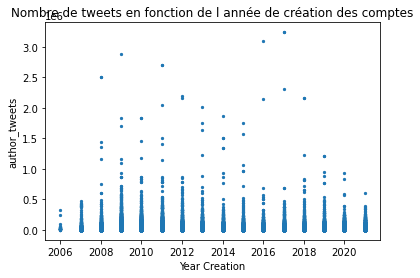

In [93]:
#1 Scatter Plot
import matplotlib.pyplot as plt

x = df_users_dup['Year Creation']
y = df_users_dup['author_tweets']

plt.scatter(x,y, s=5)

plt.title('Nombre de tweets en fonction de l année de création des comptes' )
plt.xlabel('Year Creation')
plt.ylabel('author_tweets')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [99]:
df_users_dup.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_following', 'author_listed', 'author_description',
       'author_location', 'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'Year Creation', 'FF_ratio2', 'FF_Ratio',
       'Number Of Tweets', 'Average of Likes', 'Average of retweets',
       'Average of replies', 'Average of quote_count'],
      dtype='object')

In [100]:
num_features = [ 'author_followers', 'author_tweets',
       'author_following', 'author_listed', 'author_description',
       'author_location', 'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'Year Creation', 'FF_ratio2', 'FF_Ratio',
       'Number Of Tweets', 'Average of Likes', 'Average of retweets',
       'Average of replies', 'Average of quote_count']

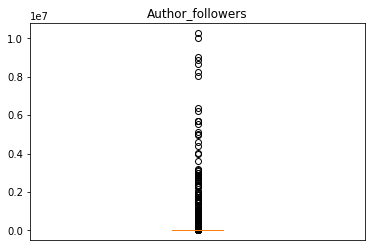

In [104]:
plt.boxplot(df_users_dup[num_features[0]])
plt.xticks([])
plt.title('Author_followers');

In [156]:
s = set()
for x in range(len(df_users_dup)):
    
    s.add(type(df_users_dup['FF_Ratio'].iloc[x]) ) 

In [86]:
df_users_dup[df_users_dup['FF_Ratio']>3].sort_values(by=['FF_Ratio'], ascending= False).head(10)

,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_Ratio,Number Of Tweets
author_id,,,,,,,,,,,,,,
1469101279,aantonop,753532,30876.0,1,10865,"#Bitcoin & Open Blockchains, since 2012. \n\nA...",59 countries and counting,False,True,NaN,2013-05-30 06:33:49+00:00,2013,753532.000000,1
1.067540921451987e+18,RemindMe_OfThis,512228,2153540.0,1,1020,Ding dong⏰! I'll remind you of any tweet whene...,Twitter,False,False,NaN,2018-11-27 22:09:24+00:00,2018,512228.000000,1
1067540921451986945,RemindMe_OfThis,512225,2153457.0,1,1020,Ding dong⏰! I'll remind you of any tweet whene...,Twitter,False,False,NaN,2018-11-27 22:09:24+00:00,2018,512225.000000,19
811972460560019456,republic,2833561,539350.0,6,2570,Official handle of the Republic Media Network....,"Mumbai, India",False,True,NaN,2016-12-22 16:31:35+00:00,2016,472260.166667,1
1.3874978717511967e+18,WatcherGuru,1639645,8484.0,5,5713,"Watcher Guru gives you unparalleled, unbiased ...","Texas, USA",False,True,NaN,2021-04-28 20:04:12+00:00,2021,327929.000000,1
1387497871751196672,WatcherGuru,1639607,8484.0,5,5712,"Watcher Guru gives you unparalleled, unbiased ...","Texas, USA",False,True,NaN,2021-04-28 20:04:12+00:00,2021,327921.400000,11
708564331332444160,GetVideoBot,586138,3100837.0,2,857,"To download a video or GIF, mention @GetVideoB...",Earth,False,False,NaN,2016-03-12 08:04:35+00:00,2016,293069.000000,2
72853440,Mochievous,463850,146216.0,2,670,Witch. Nomad. @vazilegal,Booking a flight,False,True,NaN,2009-09-09 13:36:33+00:00,2009,231925.000000,1
1039833297751302144,whale_alert,2286474,70356.0,10,10230,The most advanced #blockchain tracker and anal...,Worldwide,False,False,NaN,2018-09-12 11:09:12+00:00,2018,228647.400000,322


In [98]:
val =[0,0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9, 1]

authors_followers_stats = np.quantile(df_users_dup.author_followers, val)
authors_following_stats = np.quantile(df_users_dup.author_following, val)
author_listed_stats = np.quantile(df_users_dup.author_listed, val)
authors_tweets_stats = np.quantile(df_users_dup.author_tweets, val)
authors_years_stats =  np.quantile(df_users_dup['Year Creation'],val)
ff_ratio_stats = np.quantile(df_users_dup[df_users_dup['author_following']!=0]['FF_Ratio'],val)
ff_ratio_2_stats = np.quantile(df_users_dup[df_users_dup['author_following']!=0]['FF_Ratio2'],val)

activity_month = np.quantile( df_users_dup['Number Of Tweets'] ,val)


df_auth_followers = pd.DataFrame(authors_followers_stats, index=val,  columns = ['author_followers_stats'])
df_auth_following = pd.DataFrame(authors_following_stats, index=val, columns = ['authors_following_stats'])
df_auth_listed = pd.DataFrame(author_listed_stats, index=val, columns = ['author_listed_stats'])
df_auth_tweets = pd.DataFrame(authors_tweets_stats, index=val, columns = ['author_tweets_stats'])
df_years = pd.DataFrame(authors_years_stats, index=val,  columns = ['authors_years_stats'])
ff_ratio_stats = pd.DataFrame(ff_ratio_stats, index=val, columns = ['FF_ratio'])

activity_stats = pd.DataFrame(activity_month, index=val, columns = ['Activity/Month'])


stats = activity_stats.join(df_auth_tweets).join(df_auth_followers).join(df_auth_following).join(df_auth_listed).join(df_years).join(ff_ratio_stats)

In [99]:
#print('Sur', len(df_users_dup) ,' comptes, il y a' , df_users_dup['author_verified_bool'].sum(),'soit', df_users_dup['author_verified_bool'].sum()/  len(df_users_dup)*100, 'vérifiés')

In [100]:
len(df_users_dup)

329024

In [101]:
stats

,Activity/Month,author_tweets_stats,author_followers_stats,authors_following_stats,author_listed_stats,authors_years_stats,FF_ratio
0.0,1.0,1.0,0.0,0.0,0.0,2006.0,0.000000
0.1,1.0,40.0,2.0,21.0,0.0,2011.0,0.019608
0.2,1.0,120.0,7.0,58.0,0.0,2014.0,0.049822
0.3,1.0,267.0,18.0,107.0,1.0,2017.0,0.088608
0.4,1.0,509.0,38.0,174.0,2.0,2019.0,0.142857
0.5,1.0,922.0,70.0,271.0,3.0,2020.0,0.224900
0.6,1.0,1603.0,127.0,408.0,4.0,2021.0,0.352941
0.7,2.0,2797.0,235.0,626.0,6.0,2021.0,0.571429
0.8,3.0,5250.0,511.0,1008.0,9.0,2021.0,0.982503
0.9,6.0,12429.0,1542.0,1936.0,16.0,2021.0,2.365468


In [103]:
stats.author_tweets_stats.loc[0.7]

2797.0

### - Filtering over News and Updates (meeting 21.12)

In [571]:
df_users_dup

,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_ratio2,FF_Ratio,Number Of Tweets,Average of Likes,Average of retweets,Average of replies,Average of quote_count
author_id,,,,,,,,,,,,,,,,,,,
1185049143703724033,hyblockcapital,17726,608.0,181,264,Crypto analytics. Official page of Hyblock Cap...,NaN,False,False,NaN,2019-10-18 04:25:23+00:00,2019,0.989892,97.933702,1,10.000000,0.000000,2.000000,0.000000
760676340429312000,info32523287,132,134.0,32,0,弱者の戦略/仮想通貨&NFT/ミニマル生活/原始仏教を好み生きる事は苦なのに決して満たされぬ...,NaN,False,False,NaN,2016-08-03 03:19:07+00:00,2016,0.804878,4.125000,1,0.000000,0.000000,0.000000,0.000000
1415352632407994371,YeahGenius_,27,13971.0,7,0,Get the latest news and follow the coverage of...,NaN,False,False,NaN,2021-07-14 16:49:04+00:00,2021,0.794118,3.857143,1,0.000000,0.000000,0.000000,0.000000
4441633397,H7Banksss,9,108.0,216,1,@weaboveofficial,"Paris, France",False,False,NaN,2015-12-10 21:42:43+00:00,2015,0.040000,0.041667,1,0.000000,0.000000,0.000000,0.000000
902534018867933185,shu_crypto,206,7189.0,66,1,仮想通貨投資やってます。botも少し齧ってます。億稼いで正社員やめてフリーターになりたい。,日本 東京,False,False,NaN,2017-08-29 14:10:53+00:00,2017,0.757353,3.121212,1,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053454356878479361,IdeasPrime,7526,187009.0,0,122,Follow me for real-time charts and technical a...,"London, England",False,False,NaN,2018-10-20 01:14:25+00:00,2018,1.000000,-1.000000,281,0.448399,0.056940,0.096085,0.000000
1362590381267947520,valueofcrypto,459,10519.0,23,10,"Bitcoin, Ethereum and Cardano Price Update eve...",Portugal,False,False,NaN,2021-02-19 02:30:49+00:00,2021,0.952282,19.956522,93,0.075269,0.516129,0.365591,0.032258
1107640745761091586,Cryptonomia1,1775,18987.0,60,31,⚡️LIVE Real-time Alerts | #crypto #news #tradi...,Global,False,False,NaN,2019-03-18 13:51:47+00:00,2019,0.967302,29.583333,13,0.384615,0.230769,0.384615,0.000000


In [576]:
df_us_filtered['News and Updates']= df_us_filtered.apply(lambda x : 1 if  ( 'news' or'updates') in str(x['author_description']).lower() else 0, axis=1 )
                                                                                          
                                                                                          

<ipython-input-576-fe2a63a3147d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_filtered['News and Updates']= df_us_filtered.apply(lambda x : 1 if  ( 'news' or'updates') in str(x['author_description']).lower() else 0, axis=1 )


In [577]:
df_us_filtered = df_us_filtered[df_us_filtered['News and Updates']==1]

In [579]:
len(df_us_filtered)

282

In [580]:
df_us_filtered

,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_ratio2,FF_Ratio,Number Of Tweets,Average of Likes,Average of retweets,Average of replies,Average of quote_count,News and Updates
author_id,,,,,,,,,,,,,,,,,,,,
1455470853282484232,criptobalkan,3,149.0,30,0,Posting latest news from crypto world.,Balkan,False,False,NaN,2021-11-02 09:44:32+00:00,2021,0.090909,0.100000,3,0.000000,0.000000,0.000000,0.000000,1
1342901885129404418,my_cryptofriend,87,2150.0,226,6,"#WAGMI\nWe deliver up-to-date, breaking crypto...",NaN,False,False,NaN,2020-12-26 18:35:48+00:00,2020,0.277955,0.384956,3,2.000000,0.333333,0.000000,0.000000,1
2693954383,TopFeaturedcom,7980,9596.0,7559,72,Top Featured Businesses\nNews | Products | Ser...,Top Featured Content: GO 👉,False,False,NaN,2014-07-30 21:11:02+00:00,2014,0.513547,1.055695,3,0.333333,0.000000,0.333333,0.000000,1
22763833,Outlookindia,239582,431691.0,192,1543,The Fully Loaded News Magazine From India,"Delhi, India",False,True,NaN,2009-03-04 12:45:00+00:00,2009,0.999199,1247.822917,3,1.666667,0.666667,2.333333,0.000000,1
1427972334,CroEnthousiast,23,192.0,151,7,Sharing current crypto thoughts and news.\nNot...,NaN,False,False,NaN,2013-05-14 14:23:27+00:00,2013,0.132184,0.152318,4,0.250000,0.000000,0.000000,0.250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281314234,bitcoinagile,66268,1336305.0,14034,6732,"Bitcoin, Blockchain & Beyond. #bitcoin #blockc...",Matter Doesn't Matter,False,False,NaN,2014-01-07 23:52:46+00:00,2014,0.825235,4.721961,257,0.731518,0.338521,0.595331,0.007782,1
963495628545327104,StckPro,5243,817130.0,19,93,We’ll make staying up-to-date on top of your i...,NaN,False,False,NaN,2018-02-13 19:30:33+00:00,2018,0.996389,275.947368,119,0.008403,0.000000,0.151261,0.000000,1
1347927540988571649,Bitcoin8News,6834,65259.0,6,44,I tweet about the $BTC price every 15 minutes....,NaN,False,False,NaN,2021-01-09 15:26:06+00:00,2021,0.999123,1139.000000,178,0.561798,0.056180,0.629213,0.022472,1


In [581]:
df_us_filtered.to_csv(PE_path +'Pycharm_files_V3/' + 'Users_V4.csv')

In [582]:
#df_us_filtered.loc['16973333']

In [583]:
#df_us_filtered.to_csv(PE_path +'Users_with_features.csv')

In [584]:
users_vect = df_us_filtered.index

In [585]:
df = pd.DataFrame(users_vect)

In [586]:
comb_array = np.array(np.meshgrid(users_vect, users_vect)).T.reshape(-1, 2)

In [587]:
df = pd.DataFrame(comb_array)

In [588]:
df = df[df[0]!=df[1]]

In [589]:
df = df.rename(columns={0:'User 0', 1:'User 1'})

In [590]:
print(len(df),' - ', len(users_vect))

79242  -  282


In [591]:
df.to_csv(PE_path +'Pycharm_files_V3/' + 'Peers_V4.csv')

In [592]:
len(df)

79242

In [211]:
df_us_filtered[df_us_filtered['author_verified']==True]

,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,author_account_creation,Year Creation,FF_Ratio,Number Of Tweets,FF_ratio2,News and Updates
author_id,,,,,,,,,,,,,,,,
44060322,Benzinga,254942,184029.0,2209,4761,Finance News & Media. Twitter Delayed. Latest ...,"Downtown Detroit, MI & NYC",False,True,NaN,2009-06-02 04:43:10+00:00,2009,115.410593,23,0.991410,1
989912836901089282,Blockworks_,377751,20123.0,4066,3476,Breaking news and premium crypto insights\n\n@...,"New York, NY",False,True,NaN,2018-04-27 17:03:06+00:00,2018,92.904820,23,0.989351,1
91316071,NigeriaNewsdesk,1986252,349456.0,0,3254,Breaking news and current events from around N...,NaN,False,True,NaN,2009-11-20 10:55:12+00:00,2009,-1.000000,13,1.000000,1
16973333,Independent,3633775,1355433.0,425,25705,"News, comment and features from The Independen...","London, England",False,True,NaN,2008-10-26 00:00:29+00:00,2008,8550.058824,12,0.999883,1
22763833,Outlookindia,239608,431722.0,192,1544,The Fully Loaded News Magazine From India,"Delhi, India",False,True,NaN,2009-03-04 12:45:00+00:00,2009,1247.958333,11,0.999199,1
2897392085,jamieCrypto,11773,9876.0,1838,451,"#Bitcoin Agorist, Ancap, Journalist Crypto Mem...",United States,False,True,NaN,2014-11-29 13:41:10+00:00,2014,6.405332,7,0.864962,1
260590025,JoeFloccari,99765,1310.0,181010,681,Journalist - 10 Time Emmy Award Loser. I shoot...,"New York, USA",False,True,NaN,2011-03-04 05:05:05+00:00,2011,0.551157,6,0.355320,1
953233327238021120,Timccopeland,34932,34543.0,5146,572,I run a crypto news team @TheBlock__ and weekl...,"London, England",False,True,NaN,2018-01-16 11:51:50+00:00,2018,6.788185,6,0.871600,1
271017604,SportTechie,35048,81699.0,4294,1231,Sports. Smarter. | @SBJ\n\nNewsletters: https:...,Intersection of sports & tech.,False,True,NaN,2011-03-23 18:03:55+00:00,2011,8.162087,5,0.890855,1


### 2 (c) Defining metrics and scoring

In [104]:
thresh_1 = 0.7 # -> 1
thresh_2 = 0.3 # -> 0.5


#### Creation of a scoring DF 

In [106]:
df_scoring = df_users_dup

In [114]:
stats.columns

Index(['Activity/Month', 'author_tweets_stats', 'author_followers_stats',
       'authors_following_stats', 'author_listed_stats', 'authors_years_stats',
       'FF_ratio'],
      dtype='object')

In [121]:
df_scoring.columns

Index(['username', 'author_followers', 'author_tweets', 'author_following',
       'author_listed', 'author_description', 'author_location',
       'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'Year Creation', 'FF_Ratio',
       'Number Of Tweets', 'Score_Verified', 'Score_Following',
       'Score_Followers', 'Score_Tweets', 'Score_Listed',
       'Score_Month_Activity', 'Score_Years', 'Score_FF'],
      dtype='object')

In [108]:
df_scoring['Score_Verified'] = df_users_dup.apply(lambda x: 1 if x['author_verified']=='True' else 0,axis=1)

In [120]:
df_scoring['Score_Followers'] = df_users_dup.apply(lambda x: 1 if x['author_followers'] > stats.author_followers_stats.loc[thresh_1] 
                                                   else 0.5 if x['author_followers'] > stats.author_followers_stats.loc[thresh_2] 
                                                   else 0,axis=1)

df_scoring['Score_Tweets'] = df_users_dup.apply(lambda x: 1 if x['author_tweets'] > stats.author_tweets_stats.loc[thresh_1] 
                                                   else 0.5 if x['author_tweets'] > stats.author_tweets_stats.loc[thresh_2] 
                                                   else 0,axis=1)

df_scoring['Score_Following'] = df_users_dup.apply(lambda x: 1 if x['author_following'] > stats.authors_following_stats.loc[thresh_1] 
                                                   else 0.5 if x['author_following'] > stats.authors_following_stats.loc[thresh_2] 
                                                   else 0,axis=1)

df_scoring['Score_Listed'] = df_users_dup.apply(lambda x: 1 if x['author_listed'] > stats.author_listed_stats.loc[thresh_1] 
                                                   else 0.5 if x['author_listed'] > stats.author_listed_stats.loc[thresh_2] 
                                                   else 0,axis=1)

df_scoring['Score_Month_Activity'] = df_users_dup.apply(lambda x: 1 if x['Number Of Tweets'] > stats['Activity/Month'].loc[thresh_1] 
                                                   else 0.5 if x['Number Of Tweets'] > stats['Activity/Month'].loc[thresh_2] 
                                                   else 0,axis=1)

df_scoring['Score_Years'] = df_users_dup.apply(lambda x: 1 if x['Year Creation'] > stats.authors_years_stats.loc[thresh_1] 
                                                   else 0.5 if x['Year Creation'] > stats.authors_years_stats.loc[thresh_2] 
                                                   else 0,axis=1)

df_scoring['Score_FF'] = df_users_dup.apply(lambda x: 1 if x['FF_Ratio'] > stats.FF_ratio.loc[thresh_1] 
                                                   else 0.5 if x['FF_Ratio'] > stats.FF_ratio.loc[thresh_2] 
                                                   else 0,axis=1)


#df_scoring['Score_Followers'] = df_users_dup.apply(lambda x: 1 if x['author_followers'] > stats.author_tweets_stats.loc[thresh_1] else 0,axis=1)
#df_scoring['Score_Followers'] = df_users_dup.apply(lambda x: 1 if x['author_followers'] > stats.author_tweets_stats.loc[thresh_1] else 0,axis=1)
#df_scoring['Score_Followers'] = df_users_dup.apply(lambda x: 1 if x['author_followers'] > stats.author_tweets_stats.loc[thresh_1] else 0,axis=1)
#df_scoring['Score_Followers'] = df_users_dup.apply(lambda x: 1 if x['author_followers'] > stats.author_tweets_stats.loc[thresh_1] else 0,axis=1)



In [123]:
df_scoring.columns

Index(['username', 'author_followers', 'author_tweets', 'author_following',
       'author_listed', 'author_description', 'author_location',
       'author_private', 'author_verified', 'author_url',
       'author_account_creation', 'Year Creation', 'FF_Ratio',
       'Number Of Tweets', 'Score_Verified', 'Score_Following',
       'Score_Followers', 'Score_Tweets', 'Score_Listed',
       'Score_Month_Activity', 'Score_Years', 'Score_FF'],
      dtype='object')

In [137]:
df_scoring[scoring_cols]

,Score_Verified,Score_Following,Score_Followers,Score_Tweets,Score_Listed,Score_Month_Activity,Score_Years,Score_FF
author_id,,,,,,,,
1414041903885131779,0,0.5,0.5,1.0,1.0,1.0,0.5,1.0
1440365742549987332,0,0.0,0.0,1.0,0.5,1.0,0.5,0.5
1286338798767370240,0,0.0,0.0,1.0,0.0,1.0,0.5,0.0
1422240907349397508,0,0.5,0.5,1.0,1.0,1.0,0.5,0.5
1368629670875258880,0,0.0,1.0,1.0,1.0,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...
1415934304907972612,0,0.5,0.0,0.5,0.0,0.0,0.5,0.0
1415934958498062339,0,0.5,0.5,0.5,0.0,0.0,0.5,0.5
1415939162063007744,0,1.0,0.5,0.5,0.5,0.0,0.5,0.0


In [138]:
scoring_cols = ['Score_Verified', 'Score_Following',
       'Score_Followers', 'Score_Tweets', 'Score_Listed',
       'Score_Month_Activity', 'Score_Years', 'Score_FF']

df_scoring['Score'] = df_scoring[scoring_cols].mean(axis=1)

In [142]:
out = df_scoring.sort_values(by='Score',ascending = False)

In [145]:
out['Number Of Tweets'].sum()

1213916

In [147]:
out

,username,author_followers,author_tweets,author_following,author_listed,author_description,author_location,author_private,author_verified,author_url,...,Number Of Tweets,Score_Verified,Score_Following,Score_Followers,Score_Tweets,Score_Listed,Score_Month_Activity,Score_Years,Score_FF,Score
author_id,,,,,,,,,,,,,,,,,,,,,
1005086192789016576,CityAM_Crypto,6727,9181.0,4159,81,Founder:Crypto AM & Jade City | Global Ambassa...,"City of London, London",False,True,NaN,...,4,1,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.9375
1098694844006977536,CordovaTrades,115101,45185.0,3771,1719,Trader. NOT financial advice. If you make too ...,"Rednecktopia, FL",False,True,NaN,...,3,1,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.9375
1.200616796295848e+18,unusual_whales,1012908,92210.0,2421,8459,Tools for Stocks/Options/Crypto/Market News. N...,NaN,False,True,NaN,...,3,1,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.9375
989178055393497091,DigPerspectives,133534,62965.0,13989,592,Founder Of Digital Perspectives.Not Financial ...,United States,False,True,NaN,...,43,1,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.9375
1388487332093997057,punk6529,421057,31841.0,3129,7820,https://t.co/RIvGdr2i6K\nhttps://t.co/0EOOwrBn...,The Open Metaverse,False,True,NaN,...,19,1,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.9375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985937295,filipovic81,5,92.0,103,0,NaN,NaN,False,False,NaN,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
854336865620697089,dybdahl_andreas,2,20.0,36,0,NaN,NaN,False,False,NaN,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1447020246,momency,4,99.0,49,0,God is my backbone,Port Harcourt,False,False,NaN,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
